In [76]:
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
titanic_data = pd.read_csv('/content/drive/MyDrive/Examen_Machine-L/train.csv')
titanic_data = pd.read_csv('/content/drive/MyDrive/Examen_Machine-L/test.csv')
titanic_data = pd.read_csv('/content/drive/MyDrive/Examen_Machine-L/gender_submission.csv')


In [134]:
titanic_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [135]:
titanic_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [136]:
titanic_data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


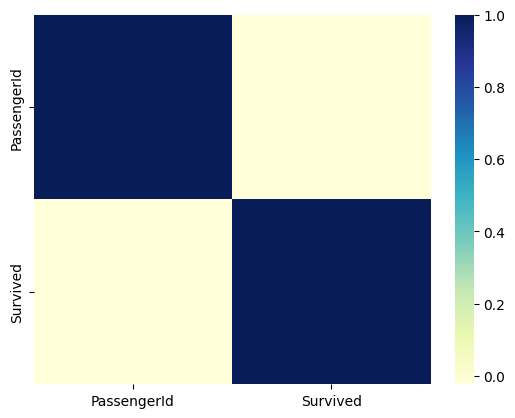

In [137]:
numeric_data = titanic_data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [138]:
titanic_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [139]:
from posixpath import split # This import is not needed
from sklearn.model_selection import StratifiedShuffleSplit

titanic_data = titanic_data.reset_index()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_index]
    strat_test_set = titanic_data.loc[test_index]

KeyError: "['Pclass', 'Sex'] not in index"

In [96]:
strat_train_set

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,867,867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
619,619,619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
50,50,50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
286,286,286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
834,834,834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
518,518,518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
54,54,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
603,603,603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S


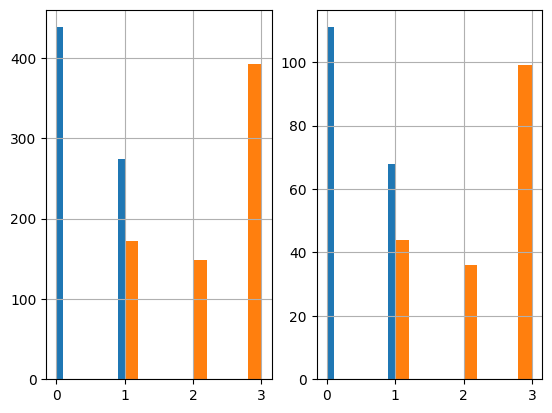

In [97]:
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.subplot(1, 2, 2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [98]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      712 non-null    int64  
 1   index        712 non-null    int64  
 2   PassengerId  712 non-null    int64  
 3   Survived     712 non-null    int64  
 4   Pclass       712 non-null    int64  
 5   Name         712 non-null    object 
 6   Sex          712 non-null    object 
 7   Age          565 non-null    float64
 8   SibSp        712 non-null    int64  
 9   Parch        712 non-null    int64  
 10  Ticket       712 non-null    object 
 11  Fare         712 non-null    float64
 12  Cabin        167 non-null    object 
 13  Embarked     710 non-null    object 
dtypes: float64(2), int64(7), object(5)
memory usage: 83.4+ KB


In [113]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def fit_transform(self, x, y=None):
     return self
  def transform(self, x):
    imputer = SimpleImputer(strategy="mean")
    x['Age']= imputer.fit_transform(x[['Age']])
    return x

In [114]:
from sklearn.preprocessing import OneHotEncoder
class MostFrequentImputer(BaseEstimator, TransformerMixin):

  def fit(self, x, y=None):
      return self

  def transform(self, x):
      encoder = OneHotEncoder()
      matrix = encoder.fit_transform(X[['Embarked']]).toarray()
      Column_names = ['C', 'S', 'Q']

      for i in range(len(matrix.T)):
          [Column_names[i]] = matrix.T[i]
          matrix = encoder.fit_transform(x[['Sex']]).toarray()
          Column_names = ['Female', 'Male']

      for i in range(len(matrix.T)):
          x[Column_names[i]] = matrix.T[i]

          return x

In [117]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, x, y=None):
    return self

  def transform(self, x):
    return x.drop(["Embarked""Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [116]:
from sklearn.pipeline import Pipeline

# Instantiate de la classes
pipeline = Pipeline([
        ("ageimputer", DataFrameSelector()),  # Use DataFrameSelector to impute ages
        ("featureencoder", MostFrequentImputer()),  # Assuming featureencoder is MostFrequentImputer
        ("featuredropper", FeatureDropper())
])

In [121]:
strat_train_set = pipeline.fit_transform(strat_train_set)

TypeError: 'RegexFlag' object is not subscriptable

In [118]:
strat_train_set

,level_0,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,867,867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
619,619,619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
50,50,50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
286,286,286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
834,834,834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
518,518,518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
54,54,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
603,603,603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S


In [124]:
from sklearn.preprocessing import StandardScaler

x = strat_train_set.drop("Survived", axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

ValueError: could not convert string to float: 'Roebling, Mr. Washington Augustus II'

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()  # Initialize your classifier here
param_grid = {
    "n_estimators": [10, 100, 1000],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3],
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(x_data, y_data)

NameError: name 'x_data' is not defined

In [129]:
from typing_extensions import final
final_clf = grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [130]:
final_clf

NameError: name 'final_clf' is not defined

In [144]:
import pandas as pd

# Assuming 'Order No' and 'Time from Pickup to Arrival' are columns in your data
# Replace with your actual data
data = {'Order No': [1, 2, 3], 'Time from Pickup to Arrival': [10, 15, 20]}

x_data = pd.DataFrame(data)

submission = pd.DataFrame({'Order No': x_data['Order No'], 'Time from Pickup to Arrival': x_data['Time from Pickup to Arrival']})
print(submission.sample())

   Order No  Time from Pickup to Arrival
2         3                           20


In [145]:
# Créons un fichier de soumission csv
from google.colab import files
submission.to_csv('ibrahim_submission.csv', index = False)
files.download('ibrahim_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>